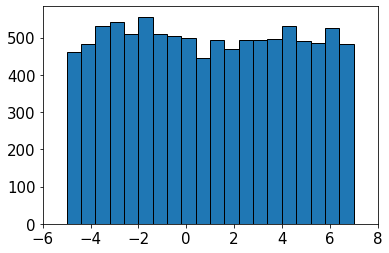

six,six,five,three,one,five,three,one,five,three,one,six,four,two,six,four,two,four,two,one,five,three,one,five,three,one,five,three,one,five,

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
#def pseudo_uniform_badmethod(mult=5,mod=11,seed=1,size=1):
  #  U=np.zeros(size)
  #  x=(seed*mult+1)%mod
   # U[0]=x/mod
   # for i in range(1,size)
   #     x=(x*mult+1)%mod
   #     U[i]=x/mod
   # return U
# This is a bad method of creating a random number generator
def pseudo_uniform_good(mult=16807,mod=(2**31)-1,seed=123456789,size=1):
    U=np.zeros(size)
    x=(seed*mult+1)%mod
    U[0]=x/mod
    for i in range(1,size):
        x=(x*mult+1)%mod
        U[i]=x/mod
    return U
def pseudo_uniform(low=0,high=1,seed=123456789,size=1):
    return low+(high-low)*pseudo_uniform_good(seed=seed,size=size)
l=pseudo_uniform(low=-5,high=7,size=10000)
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-6,8)
plt.show()

def sample_pick(lst):
    t=time.perf_counter()
    seed=int(10**9*float(str(t-int(t))[0:]))
    l=len(lst)
    s=pseudo_uniform(low=0,high=l,seed=seed,size=1)
    idx=int(s)
    return (lst[idx])


dice_faces=['one','two','three','four','five','six']
for _ in range(30):
    print(sample_pick(dice_faces),end=',')
    
def pseudo_bernoulli(p=0.5,size=1):
    t=time.perf_counter()
    seed=int(10**9*float(str(t-int(t))[0:]))
    B=pseudo_uniform(seed=seed,size=size)
    B=(B<=p).astype(int)
    return B

def pseudo_binomial(n=100,p=0.5,size=1):
    binom=[]
    for _ in range(size):
        t=time.perf_counter()
        seed=int(10**9*float(str(t-int(t))[0:]))
        U=pseudo_uniform(size=n,seed=seed)
        Y=(U<=p).astype(int)
        binom.append(np.sum(Y))
    return binom


def pseudo_poisson(alpha,size=1):
    poisson=[]
    for _ in range(size):
        t=time.perf_counter()
        seed=int(10**9*float(str(t-int(t))[0:]))
        U=pseudo_uniform(seed=seed,size=5*alpha)
        X,P,i=0,1,0
        while(P>=np.exp(-alpha)):
            P=U[i]*P
            X+=1
            i+=1
        poisson.append(X)
    return np.array(poisson)
pseudo_binomial(n=100,p=0.75,size=15)

def pseudo_exp(lamb,size=-1):
    t=time.perf_counter()
    seed=int(10**9*float(str(t-int(t))[0:]))
    U=pseudo_uniform(size=size,seed=seed)
    X=-(1/lamb)*(np.log(1-U))
    return X

def pseudo_normal(mu=0.0,sigma=1.0,size=1):
    t=time.perf_counter()
    seed=int(10**9*float(str(t-int(t))[0:]))
    U1=pseudo_uniform(seed=seed1,size=size)
    t=time.perf_counter()
    seed2=int(10**9*float(str(t-int(t))[0:]))
    U2=pseudo_uniform(seed=seed,size=size)
    Z0=np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    Z1=np.sqrt(-2*np.log(U2))*np.cos(2*np.pi*U2)
    Z0=Z0*sigma+mu
    return Z0
